In [1]:
# Import libraries needed.
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)

# Assign plotting style.
plt.style.use('seaborn')

In [2]:
# Import the dataset as a pandas dataframe.
survey = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Applied DS 2/Assignment 2/responses.csv')
survey.head()

,"If you want to add your salary to this spreadsheet, go here: https://www.askamanager.org/2019/04/how-much-money-do-you-make-3.html",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional wo...,"If your job title needs additional context, pl...","If ""Other,"" please indicate the currency here:"
1,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,NaN
2,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN,NaN
3,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN,NaN
4,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,NaN


# Cleaning

In [3]:
"""
The first step in cleaning in preparation for analysis will be removing null values, and information that is redundant to
our research.
The first row looks useless.
The last column contains explanations of the jobs, which won't be useful for statistical analysis. So we will drop that too.
"""

missing_values = ["No data", "NaN", ""]

survey = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Applied DS 2/Assignment 2/responses.csv', skiprows = 1,
                    na_values = missing_values)
survey = survey.drop('If your job title needs additional context, please clarify here:', 1)
survey.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional work experience do you have?,"If ""Other,"" please indicate the currency here:"
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years,NaN


In [4]:
# Now, the names of the rows are too long and that's an inconvenience while coding.
# We will manually change column names to be more managable.

survey.rename(columns = {'Timestamp':'date',
                         'How old are you?':'age', 
                        'What industry do you work in?': 'industry',
                        'Job title': 'occupation',
                         'What is your annual salary?':'salary_annum',
                        'Please indicate the currency':'currency',
                        'Where are you located? (City/state/country)':'location',
                        'How many years of post-college professional work experience do you have?':'experience_years',
                        survey.columns[8]:'currency_other'}, inplace = True)

# The last column has quotations around the word "Other," which causes the quotes in the code to go undetected. 
# To work around this, we change the column name using its index instead of content. 

survey.head()

,date,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years,NaN


In [5]:
# Now we will proceed with cleaning column by column. 
# The most relevant information in the date column is the year, so we will delete the rest and keep the years.

In [6]:
# First we check the type and change it to datetime if it is not that.
print(survey['date'].dtype)

object


In [7]:
# Change it to datetime.
survey['date'] = pd.to_datetime(survey['date'])
print (survey['date'].dtype)

datetime64[ns]


In [8]:
# We will now extract the years into a new column, then drop the old date column.
survey['year'] = survey['date'].dt.year
survey = survey.drop('date', 1)
survey.head()

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,2019
1,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN,2019
2,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,2019
4,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years,NaN,2019


In [9]:
# Removing unwanted characters from the industry and occupation columns.

survey['industry'] = survey['industry'].str.replace(r"\(.*\)",'')
survey['occupation'] = survey['occupation'].str.replace(r"\(.*\)",'')

survey

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,2019
1,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN,2019
2,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,2019
4,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,NaN,2019
...,...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,"115,000",USD,"Portland, OR",8 - 10 years,NaN,2021
34544,25-34,Manufacturing,QC Chemist,"92,000",USD,California,5-7 years,NaN,2021
34545,25-34,media,research and digital strategist,84700,USD,"Washington, dc",5-7 years,NaN,2021
34546,25-34,Defense,Data Scientist,81950,USD,Springfield/VA/USA,2 - 4 years,NaN,2021


In [10]:
# Moving onto the salary column, we deal with NaN values.
survey['salary_annum'].isnull().values.any()

True

In [11]:
# Dropping them.
survey.dropna(subset = ['salary_annum'], inplace = True)

# Checking that it worked we run this line again.
survey['salary_annum'].isnull().values.any()

False

In [12]:
# Removing unwanted characters from the salary 'salary_annum', such as currency symbols, commas, etc. 

print(survey['salary_annum'].dtype)

object


In [13]:
# Check if there are per/hour entries.

survey['salary_annum'].str.count('HR|hour|hr|Hour').sum()

125

In [14]:
""" Since the survey asked for annual salaries, we will drop hourly entries. Because there's no way of knowing how many hours 
a person worked, or how many days a year, etc."""

survey = survey[survey['salary_annum'].str.contains('HR|hour|hr|Hour') == False]
survey

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,2019
1,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years,NaN,2019
2,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years,NaN,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,2019
4,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,NaN,2019
...,...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,"115,000",USD,"Portland, OR",8 - 10 years,NaN,2021
34544,25-34,Manufacturing,QC Chemist,"92,000",USD,California,5-7 years,NaN,2021
34545,25-34,media,research and digital strategist,84700,USD,"Washington, dc",5-7 years,NaN,2021
34546,25-34,Defense,Data Scientist,81950,USD,Springfield/VA/USA,2 - 4 years,NaN,2021


In [15]:
survey['salary_annum'] = survey['salary_annum'].str.replace(r'\$','').str.replace(r'\£','').str.replace(r'\,','')
survey['salary_annum'] = survey['salary_annum'].str.replace(r'K','000').str.replace(r'k','000')
survey['salary_annum'] = survey['salary_annum'].str.extract('(\d+)', expand = False)
survey

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"Madison, Wi",8 - 10 years,NaN,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"Las Vegas, NV",2 - 4 years,NaN,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,2019
4,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,NaN,2019
...,...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"Portland, OR",8 - 10 years,NaN,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,California,5-7 years,NaN,2021
34545,25-34,media,research and digital strategist,84700,USD,"Washington, dc",5-7 years,NaN,2021
34546,25-34,Defense,Data Scientist,81950,USD,Springfield/VA/USA,2 - 4 years,NaN,2021


In [16]:
# Now we will look for useless salary information.

errors = survey[pd.to_numeric(survey['salary_annum'], errors = 'coerce').isnull()]
errors

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
6030,55-64,Property management,Resident manager,NaN,USD,"San Francisco, CA",31 - 40 years,NaN,2019
16170,65 or over,unemployed,anticipator,NaN,USD,Chicagoland,31 - 40 years,NaN,2019
17917,18-24,NaN,B,NaN,USD,NaN,11 - 20 years,NaN,2019
19644,under 18,NaN,G,NaN,USD,NaN,1 year or less,NaN,2019
23013,under 18,NaN,Golf Mower,NaN,USD,NaN,1 year or less,NaN,2019
25547,25-34,AVIATION,TEST,NaN,USD,TEST,5-7 years,NaN,2019
27075,18-24,Holy,Jizz's God,NaN,USD,NaN,1 year or less,NaN,2019
28470,45-54,NaN,Director,NaN,USD,"Bay Area, CA",11 - 20 years,NaN,2019
31485,under 18,job,job,NaN,EUR,NaN,21 - 30 years,ln,2019
32771,35-44,Entertainment,"SAG-AFTRA Actress, Photo-Double, Stand-In, Bac...",NaN,USD,"Brooklyn, New York, USA",11 - 20 years,NaN,2019


In [17]:
# We will remove these values.

survey = survey.drop(errors.index, axis = 0)
survey

,age,industry,occupation,salary_annum,currency,location,experience_years,currency_other,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,NaN,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"Madison, Wi",8 - 10 years,NaN,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"Las Vegas, NV",2 - 4 years,NaN,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,NaN,2019
4,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,NaN,2019
...,...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"Portland, OR",8 - 10 years,NaN,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,California,5-7 years,NaN,2021
34545,25-34,media,research and digital strategist,84700,USD,"Washington, dc",5-7 years,NaN,2021
34546,25-34,Defense,Data Scientist,81950,USD,Springfield/VA/USA,2 - 4 years,NaN,2021


In [18]:
# The "other currency" column is redundant. We can merge it with the currency column.

# First, we replace all the "other" values in the currency column with NaN.
locmask = survey.currency.eq('Other')                                                                                     
survey.loc[locmask, 'currency'] = np.nan

In [19]:
# Then we replace all the NaN values with the correct currencies from the other column.
survey.currency.fillna(survey.currency_other, inplace = True)

# Deleting the "other" dataframe.
survey = survey.drop('currency_other', 1)
survey

,age,industry,occupation,salary_annum,currency,location,experience_years,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"Madison, Wi",8 - 10 years,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"Las Vegas, NV",2 - 4 years,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years,2019
4,25-34,Healthcare,Social worker,55000,USD,"Southeast Michigan, USA",5-7 years,2019
...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"Portland, OR",8 - 10 years,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,California,5-7 years,2021
34545,25-34,media,research and digital strategist,84700,USD,"Washington, dc",5-7 years,2021
34546,25-34,Defense,Data Scientist,81950,USD,Springfield/VA/USA,2 - 4 years,2021


In [20]:
# Now we move onto location column.

# Since the core interest of this survery is regional salary, we will find entries that are missing a location and drop them.

survey['location'].isnull().values.any()

True

In [21]:
# This tells us there are missing values in the location column. We will drop those based on the column.

survey.dropna(subset = ['location'], inplace = True)

# Checking that it worked we run this line again.
survey['location'].isnull().values.any()

False

In [22]:
# Now we change all the entries to lower case to avoid any conflict.

survey['location'] = survey['location'].str.lower()
survey['location'] = survey['location'].str.strip()
survey

,age,industry,occupation,salary_annum,currency,location,experience_years,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"nashville, tn",11 - 20 years,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"madison, wi",8 - 10 years,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"las vegas, nv",2 - 4 years,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"cardiff, uk",5-7 years,2019
4,25-34,Healthcare,Social worker,55000,USD,"southeast michigan, usa",5-7 years,2019
...,...,...,...,...,...,...,...,...
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"portland, or",8 - 10 years,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,california,5-7 years,2021
34545,25-34,media,research and digital strategist,84700,USD,"washington, dc",5-7 years,2021
34546,25-34,Defense,Data Scientist,81950,USD,springfield/va/usa,2 - 4 years,2021


In [23]:
# Removing the word 'years' from experience_years column.
survey['experience_years'] = survey['experience_years'].str.replace(r'years','')
survey.head()

,age,industry,occupation,salary_annum,currency,location,experience_years,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"nashville, tn",11 - 20,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"madison, wi",8 - 10,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"las vegas, nv",2 - 4,2019
3,25-34,Biotechnology,Senior Scientist,34600,GBP,"cardiff, uk",5-7,2019
4,25-34,Healthcare,Social worker,55000,USD,"southeast michigan, usa",5-7,2019


In [24]:
"""
The data is cleaner now, but not perfect. Cleaning the 'location' column depends highly on what the analysis is, 
as it contains a lot of information. There are various approaches to take for different results.
In this report, we are interested in the salaries by region, for the 50 American states. Thus, we will create a copy dataframe
with just USA entries. We will include state capitals to minimise any data loss, incase people didn't include state name.
"""

# First, we import a dataset containing all the state names and their capitals and abbreviations.
states = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Applied DS 2/Assignment 2/states.csv')

# Change everything to lower case to avoid conflicts.
states['NAME'] = states['NAME'].str.lower()
states

,NAME
0,alabama
1,alaska
2,arizona
3,arkansas
4,california
...,...
145,richmond
146,olympia
147,charleston
148,madison


In [25]:
states_list = states['NAME'].tolist()

In [26]:
# Now that we have our list, we will create the copy dataframe and clean some values out of the location column.

survey_usa = survey.copy()
survey_usa = survey_usa[(survey_usa['currency'] == 'USD')]

survey_usa['location'] = survey_usa['location'].str.replace(r'USA', '').str.replace(r'usa', '')
survey_usa['location'] = survey_usa['location'].str.replace(r'U.S.A', '').str.replace(r'united states', '')
survey_usa

,age,industry,occupation,salary_annum,currency,location,experience_years,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"nashville, tn",11 - 20,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"madison, wi",8 - 10,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"las vegas, nv",2 - 4,2019
4,25-34,Healthcare,Social worker,55000,USD,"southeast michigan,",5-7,2019
5,25-34,Information Management,Associate Consultant,45000,USD,"seattle, wa",8 - 10,2019
...,...,...,...,...,...,...,...,...
34542,25-34,Real Estate,Marketing Manager,65000,USD,portland/or/,5-7,2021
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"portland, or",8 - 10,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,california,5-7,2021
34545,25-34,media,research and digital strategist,84700,USD,"washington, dc",5-7,2021


In [27]:
# But there are countries that use USD like in eastern europe. So we will filter those to only places containing US states.

pattern = '|'.join(states_list)

In [28]:
# Back to our original dataframe, we will create a new subset of the dataset just for the USA. 

survey_usa = survey_usa[survey_usa['location'].str.contains(pattern) == True]
survey_usa

,age,industry,occupation,salary_annum,currency,location,experience_years,year
0,35-44,Government,Talent Management Asst. Director,75000,USD,"nashville, tn",11 - 20,2019
1,25-34,Environmental nonprofit,Operations Director,65000,USD,"madison, wi",8 - 10,2019
2,18-24,Market Research,Market Research Assistant,36330,USD,"las vegas, nv",2 - 4,2019
4,25-34,Healthcare,Social worker,55000,USD,"southeast michigan,",5-7,2019
5,25-34,Information Management,Associate Consultant,45000,USD,"seattle, wa",8 - 10,2019
...,...,...,...,...,...,...,...,...
34542,25-34,Real Estate,Marketing Manager,65000,USD,portland/or/,5-7,2021
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,"portland, or",8 - 10,2021
34544,25-34,Manufacturing,QC Chemist,92000,USD,california,5-7,2021
34545,25-34,media,research and digital strategist,84700,USD,"washington, dc",5-7,2021


In [29]:
# Replacing possible delimiters with , :
survey_usa['location'] = survey_usa['location'].str.replace('/', ',')
survey_usa[['city', 'state']] = survey_usa['location'].str.split(',', expand = True, n = 1)
survey_usa = survey_usa.drop('location', 1)
survey_usa

,age,industry,occupation,salary_annum,currency,experience_years,year,city,state
0,35-44,Government,Talent Management Asst. Director,75000,USD,11 - 20,2019,nashville,tn
1,25-34,Environmental nonprofit,Operations Director,65000,USD,8 - 10,2019,madison,wi
2,18-24,Market Research,Market Research Assistant,36330,USD,2 - 4,2019,las vegas,nv
4,25-34,Healthcare,Social worker,55000,USD,5-7,2019,southeast michigan,
5,25-34,Information Management,Associate Consultant,45000,USD,8 - 10,2019,seattle,wa
...,...,...,...,...,...,...,...,...,...
34542,25-34,Real Estate,Marketing Manager,65000,USD,5-7,2021,portland,"or,"
34543,45-54,Healthcare,Senior Software Engineer,115000,USD,8 - 10,2021,portland,or
34544,25-34,Manufacturing,QC Chemist,92000,USD,5-7,2021,california,None
34545,25-34,media,research and digital strategist,84700,USD,5-7,2021,washington,dc


In [30]:
# We will reorder the columns in an order that's more intuitive.

survey_usa = survey_usa[['year', 'city', 'state', 'age', 'industry', 'occupation',
                         'salary_annum', 'currency', 'experience_years']]
survey_usa.head

<bound method NDFrame.head of        year                city state    age                 industry  \
0      2019           nashville    tn  35-44               Government   
1      2019             madison    wi  25-34  Environmental nonprofit   
2      2019           las vegas    nv  18-24          Market Research   
4      2019  southeast michigan        25-34               Healthcare   
5      2019             seattle    wa  25-34   Information Management   
...     ...                 ...   ...    ...                      ...   
34542  2021            portland   or,  25-34              Real Estate   
34543  2021            portland    or  45-54               Healthcare   
34544  2021          california  None  25-34            Manufacturing   
34545  2021          washington    dc  25-34                    media   
34546  2021         springfield   va,  25-34                  Defense   

                             occupation salary_annum currency experience_years  
0      Talen

In [31]:
""" We can see that with all this cleaning, we filtered out 6632 entries. Now we may proceed with the occupation and industry 
columns for the USA. """

# First we find and deal with missing data.
survey_usa['occupation'].isnull().values.any()

False

In [32]:
survey_usa['industry'].isnull().values.any()

True

In [33]:
survey_usa['industry'].isnull().values.sum()

493

In [34]:
"""
494 industry entries are missing, but none are missing in the occupation column.
Thus, dropping null values will result in much dataloss in occupation data, which is what we are interesed in.
So, we will replace the missing industries with "other".
"""

survey_usa = survey_usa.replace(np.nan, 'other', regex = True)

In [35]:
# The industry and occpation columns contain many unique entries, but most of them can be grouped into catagories.
# We'll find the most 20 most common industries in the dataset. 

survey_usa['industry'] = survey_usa['industry'].str.lower()

survey_usa['industry'].value_counts()[:30].sort_values(ascending = False)

healthcare                989
higher education          798
education                 768
tech                      699
technology                616
software                  587
it                        533
nonprofit                 505
finance                   493
other                     493
government                467
legal                     424
manufacturing             398
retail                    354
law                       331
insurance                 324
non-profit                300
construction              280
academia                  258
consulting                249
marketing                 249
banking                   234
financial services        223
publishing                199
education                 195
media                     193
health care               186
information technology    183
advertising               171
real estate               159
Name: industry, dtype: int64

In [36]:
# As we can see, many of the industries are synonymous to eachother (eg, tech and technology, health care and healthcare, etc).

# To make most of the data, we will replace these with 1 word.
survey_usa.loc[survey_usa['industry'].str.contains('tech', case = False), 'industry'] = 'technology'
survey_usa.loc[survey_usa['industry'].str.contains('software', case = False), 'industry'] = 'technology'
survey_usa.loc[survey_usa['industry'].str.contains('it', case = False), 'industry'] = 'technology'
survey_usa.loc[survey_usa['industry'].str.contains('information technology', case = False), 'industry'] = 'technology'
survey_usa.loc[survey_usa['industry'].str.contains('advertising', case = False), 'industry'] = 'marketing'
survey_usa.loc[survey_usa['industry'].str.contains('non-profit', case = False), 'industry'] = 'nonprofit'
survey_usa.loc[survey_usa['industry'].str.contains('financial services', case = False), 'industry'] = 'finance'
survey_usa.loc[survey_usa['industry'].str.contains('health care', case = False), 'industry'] = 'healthcare'
survey_usa.loc[survey_usa['industry'].str.contains('higher ed', case = False), 'industry'] = 'higher education'

# We will check the top list again with the consolidated values
common_industries = survey_usa['industry'].value_counts()[:30].sort_values(ascending = False)
common_industries

technology          7195
healthcare          1238
higher education    1153
finance              773
education            768
marketing            509
other                493
government           467
legal                424
manufacturing        398
retail               354
law                  331
insurance            324
construction         280
academia             258
consulting           249
banking              234
publishing           199
education            195
media                193
real estate          159
engineering          156
healthcare           150
aerospace            146
automotive           140
accounting           131
manufacturing        129
government           122
energy               107
libraries            101
Name: industry, dtype: int64

In [37]:
survey_usa['occupation'] = survey_usa['occupation'].str.lower()

survey_usa['occupation'].value_counts()[:30].sort_values(ascending = False)

project manager             366
software engineer           345
director                    318
manager                     231
attorney                    193
program manager             187
teacher                     178
analyst                     145
librarian                   124
senior software engineer    124
administrative assistant    122
product manager             120
operations manager          118
office manager              117
associate                   115
marketing manager           105
software developer          102
data analyst                101
executive assistant         101
consultant                   98
engineer                     93
senior manager               91
executive director           89
business analyst             86
vice president               85
editor                       83
assistant professor          79
general manager              79
hr manager                   78
account manager              76
Name: occupation, dtype: int64

In [38]:
# As we can see, many of the occupations share similar characteristics; engineer, manager, etc. 

# To make most of the data, we will replace these specific occupations into more broad catagories.
# eg: Marketing Manager -> Manager 
survey_usa.loc[survey_usa['occupation'].str.contains('manager', case = False), 'occupation'] = 'manager'
survey_usa.loc[survey_usa['occupation'].str.contains('engineer', case = False), 'occupation'] = 'engineer'
survey_usa.loc[survey_usa['occupation'].str.contains('director', case = False), 'occupation'] = 'director'
survey_usa.loc[survey_usa['occupation'].str.contains('assistant', case = False), 'occupation'] = 'assistant'
survey_usa.loc[survey_usa['occupation'].str.contains('student', case = False), 'occupation'] = 'student'
survey_usa.loc[survey_usa['occupation'].str.contains('analyst', case = False), 'occupation'] = 'analyst'
survey_usa.loc[survey_usa['occupation'].str.contains('attorney', case = False), 'occupation'] = 'attorney'
survey_usa.loc[survey_usa['occupation'].str.contains('nurse', case = False), 'occupation'] = 'nurse'
survey_usa.loc[survey_usa['occupation'].str.contains('rn', case = False), 'occupation'] = 'nurse'
survey_usa.loc[survey_usa['occupation'].str.contains('consultant', case = False), 'occupation'] = 'consultant'
survey_usa.loc[survey_usa['occupation'].str.contains('coordinator', case = False), 'occupation'] = 'coordinator'

# We will check the top list again with the consolidated values
top_occupation = survey_usa['occupation'].value_counts()[:30].sort_values(ascending = False)
top_occupation

manager                5629
director               2766
engineer               2352
analyst                1617
assistant              1155
coordinator             923
nurse                   738
consultant              445
teacher                 178
librarian               124
associate               115
software developer      102
vice president           85
editor                   83
paralegal                75
data scientist           65
student                  62
partner                  61
controller               58
graphic designer         57
associate professor      55
ceo                      51
physician                51
senior associate         48
sales                    47
owner                    47
vp                       46
supervisor               46
professor                46
accountant               45
Name: occupation, dtype: int64

# Analysis

In [39]:
# Now that the data is clean, we can carry out any analysis of interest.

# The data type for salary_annum is an object
# Thus we will change it into numeric.
survey_usa['salary_annum'] = pd.to_numeric(survey_usa['salary_annum'], downcast = 'float')

In [40]:
# Looking at the most common industries we determined previously, let's find the average salary of some of the entries.
# We will create a pivot table for each entry.

# Technology:
tech_pivot = survey_usa.loc[survey_usa.industry == 'technology', :].reset_index(drop = True)
tech_pivot['salary_annum'].mean()

107730.9296875

In [41]:
# Healthcare:
health_pivot = survey_usa.loc[survey_usa.industry == 'healthcare', :].reset_index(drop = True)
health_pivot['salary_annum'].mean()

107239.140625

In [42]:
# Education:
edu_pivot = survey_usa.loc[survey_usa.industry == 'education', :].reset_index(drop = True)
edu_pivot['salary_annum'].mean()

66325.3671875

In [43]:
# We can also use groupby to find out the regional average salary in certain industries or occupations.

# Technology per state:
tech_pivot.groupby('state', as_index = False)[['industry', 'salary_annum']]\
  .agg({'industry': lambda x: pd.Series.mode(x)[0], 'salary_annum':'mean'})

,state,industry,salary_annum
0,,technology,89703.72
1,,technology,91499.51
2,(not nyc),technology,41000.00
3,"ca,",technology,93000.00
4,"california,",technology,80000.00
...,...,...,...
667,"wi,",technology,82162.50
668,wisconsin,technology,120000.00
669,"wisconsin,",technology,103502.62
670,"work from home, nj hq",technology,94000.00


In [44]:
# Let's find the top 20 highest paying cities in the Tech industry.
high_salary_tech = tech_pivot.groupby('city').mean().sort_values(by = 'salary_annum',
                                                                       ascending = False)['salary_annum'][:20]
top_10_salary = high_salary_tech.index.tolist()
values_high_salary = high_salary_tech.values.tolist()
high_salary_tech

city
cupertino               1369939.88
newark nj               1200000.00
palm beach               750000.00
irvine ca                475000.00
cupertino                400000.00
kentfield                400000.00
erie                     393500.00
seattle washington       380000.00
los gatos                375000.00
rochester                350000.00
butte                    345000.00
nj                       320000.00
sunnyvale california     320000.00
st. louis mo             312000.00
doylestown               301000.00
short hills              300000.00
lafayette la             300000.00
grand rapids mi          275000.00
san diego ca             269333.34
bellevue wa              265000.00
Name: salary_annum, dtype: float32

In [45]:
# Let's find the 20 highest paid positions in the Tech industry.
high_position_tech = tech_pivot.groupby('occupation').mean().sort_values(by = 'salary_annum',
                                                                       ascending = False)['salary_annum'][:20]
top_10_job = high_position_tech.index.tolist()
values_high_job = high_position_tech.values.tolist()
high_position_tech

occupation
sales                                 1200000.00
senior vice president                  990000.00
ceo                                    897891.75
applications developer                 680000.00
vice president sales                   550000.00
senior vp - sales                      525000.00
chief medical officer                  510000.00
clo                                    485000.00
senior account executice               475000.00
innovation leader                      450000.00
senior client partner                  450000.00
information security architect         425000.00
vp of sales                            420000.00
vp asset lead                          405000.00
operating partner                      400000.00
svp product                            400000.00
head of product management             400000.00
vice president, communications         364000.00
vice president global channel sales    360000.00
vp of design                           350000.00
Name: sal

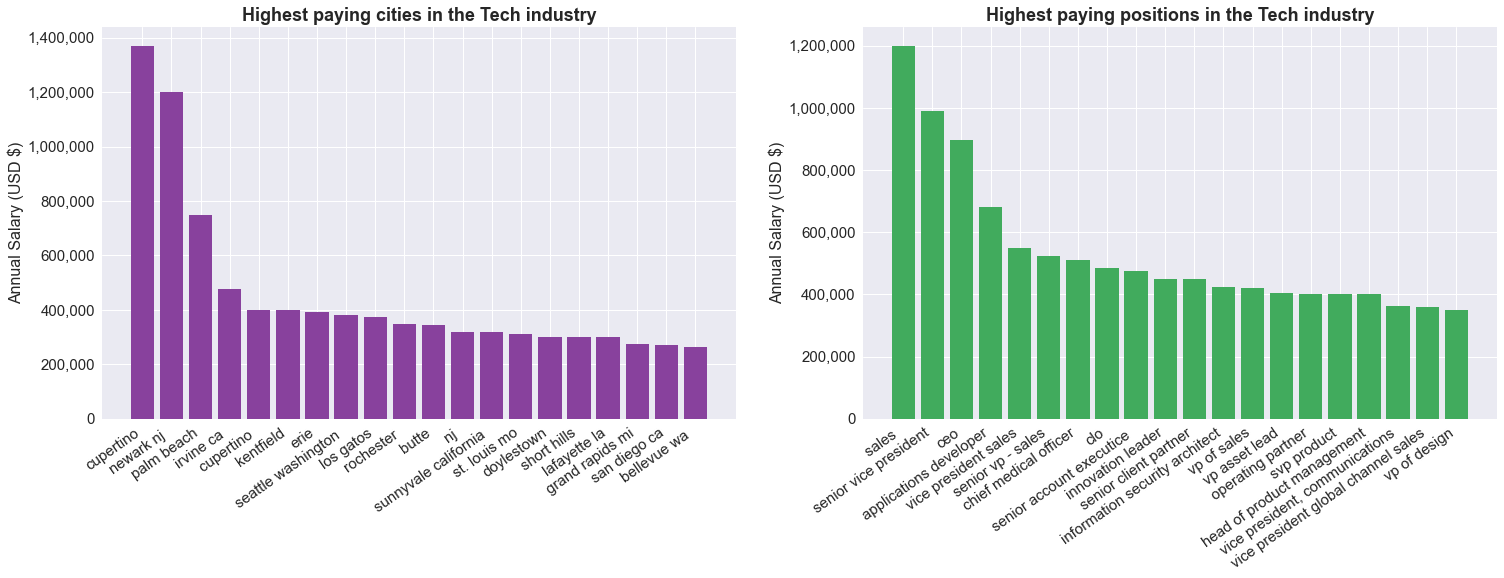

In [48]:
#  And plot a bar chart representing the lists above.
fig, ((ax1), (ax2)) = plt.subplots(figsize = (25, 8), nrows = 1, ncols = 2)
ax1.bar(x = top_10_salary, height = values_high_salary, color = '#88419d')
ax1.set_title('Highest paying cities in the Tech industry', weight = 'bold', size = 18)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.set_ylabel('Annual Salary (USD $)', size = 16)
ax1.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.bar(x = top_10_job, height = values_high_job, color = '#41ab5d')
ax2.set_title('Highest paying positions in the Tech industry', weight = 'bold', size = 18)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax2.set_ylabel('Annual Salary (USD $)', size = 16)
ax2.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.autofmt_xdate(rotation = 35)

fig.savefig('pay.png', transparent=True)

plt.show()

These are just examples of the kinds of analysis that can be performed on this dataset. As it contains a wealth of information, many other things can be looked into. For example, one could look into the correlation between salary and age, or the average years of experience for certain positions, etc. 
